### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

Shape: (12684, 26)

Dtypes:
 destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object
Duplicate rows: 74
                      missing_count  missing_percent
car                           12576            99.15
CoffeeHouse               

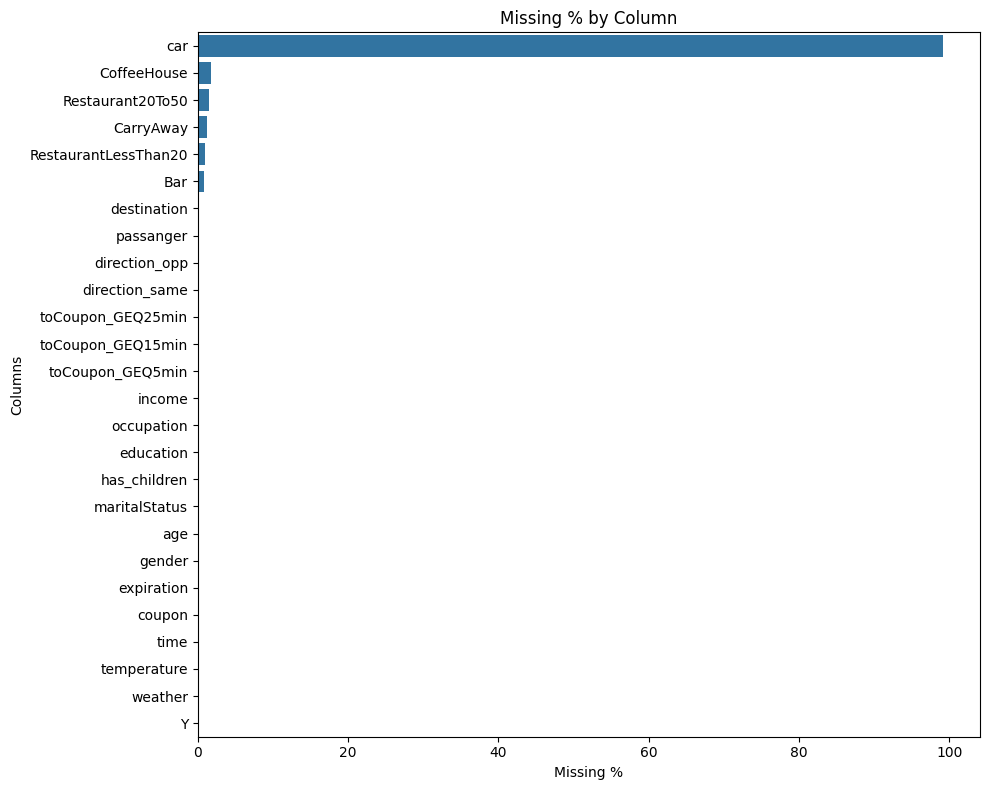

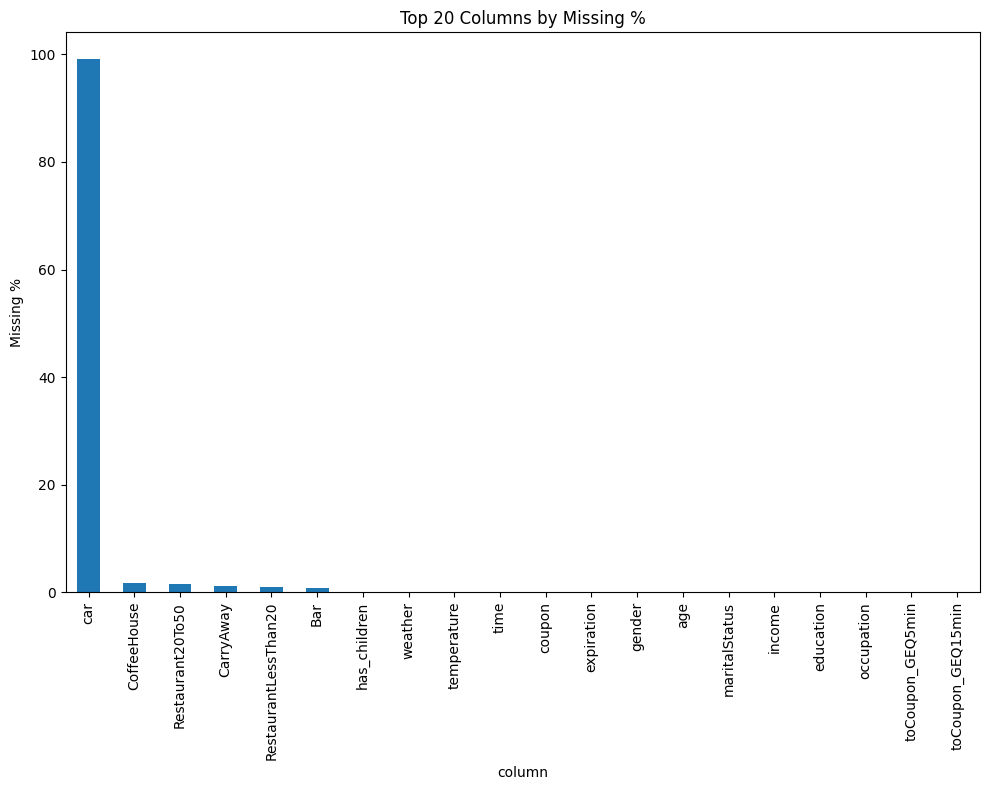

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object
{'destination': 0, 'passanger': 0, 'weather': 0, 'time': 0, 'coupon': 0, 'expiration': 0, 'gender': 0, 'age': 0, 'maritalStatus': 0, 'education': 0, 'occupation': 0, 'income': 0, '

In [4]:
## Basic shape & types
print("Shape:", data.shape)
print("\nDtypes:\n", data.dtypes)

## Find duplicate rows countDuplicate rows
dupe_count = data.duplicated().sum()
print("Duplicate rows:", dupe_count)

## List all NaN and None values
# This will first find all NaN or None values and flag as True or False.
# Then it will SUM all the false rows for "Each" column 
# And finally create one-column DataFrame "missing_count" and list the count
miss = data.isna().sum().to_frame("missing_count")

# Now add the missing percentage for each missing counts
miss["missing_percent"] = (miss["missing_count"] / len(data) * 100).round(2)

# Sorts the missingness table so the columns with the most missing values appear first.
miss = miss.sort_values("missing_count", ascending=False)

# Print Top 20
print(miss.head(20))

## Set Index
miss.index.name = "column"

## Draw Barplot

# Use Seaborn BarPlot to draw the Barplot
plt.figure(figsize=(10, 8))
sns.barplot(data=miss, x="missing_percent", y="column")
plt.title("Missing % by Column")
plt.xlabel("Missing %")
plt.ylabel("Columns")
plt.tight_layout()
plt.show()

# Using Matplotlib to create  the barplot
plt.figure(figsize=(10, 8))
miss["missing_percent"].sort_values(ascending=False).head(20).plot(kind="bar")
plt.title("Top 20 Columns by Missing %")
plt.ylabel("Missing %")
plt.tight_layout()
plt.show()


## Find and filter null-like strings as below
NULL_LIKE = {"", " ", "NA", "N/A", "na", "NaN", "None", "?", "-", "--", "Unknown"}

print(data.dtypes)
hidden_counts = {}
for c in data.columns:
    if data[c].dtype == "object":
        s = data[c].astype(str).str.strip()
        hidden_counts[c] = int(s.isin(NULL_LIKE).sum())

print(hidden_counts)

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
## Find and remove rows
df = data.drop_duplicates()
print(data.head())

# Check unique columns records for better data understanding, preserves NaN if present
# This will help visually show any data discrepancy
cols = ["destination",
        "passanger",
        "weather",
        "temperature",
        "time",
        "coupon",
        "expiration",
        "gender",
        "age",
        "maritalStatus",
        "has_children",
        "education",
        "occupation",
        "income",
        "car",
        "Bar",
        "CoffeeHouse",
        "CarryAway",
        "RestaurantLessThan20",
        "Restaurant20To50",
        "toCoupon_GEQ5min",
        "toCoupon_GEQ15min",
        "toCoupon_GEQ25min",
        "direction_same",
        "direction_opp",
        "Y"]
for col in cols:
    uniq_col_df = df[[col]].drop_duplicates().reset_index(drop=True)
    print("\nColumn Name:"+ col +"\n", uniq_col_df)
    

# Original DataFrame duplicate count
print("\nDuplicate rows:", data.duplicated().sum())

# Check for no duplicate DataFrame count
dupe_count = df.duplicated().sum()
if dupe_count == 0:
    print("*** No duplicate rows ***")
else:
    print(f"{dupe_count} duplicate rows found ❗")

## 5) Find and filter null-like strings as below
NULL_LIKE = {"", " ", "NA", "N/A", "na", "NaN", "None", "?", "-", "--", "Unknown"}
for c in df.columns:
    if df[c].dtype == "object":
        s = df[c].astype(str).str.strip()
        df.loc[s.isin(NULL_LIKE), c] = np.nan

## Implement above .....

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8           

4. What proportion of the total observations chose to accept the coupon?



In [6]:
# Proportion of observations that accepted the coupon (Y=1)

# Coerce column Y to a numeric value and NaN
yval = pd.to_numeric(data["Y"], errors="coerce")

# Drop NaNs from a Series
yval = yval.dropna()

# Confirm 0-1
print(yval.unique())

# Calculate proportion among rows where Y is present/valid
total_valid_rows = yval.notna().sum()
print(f"Total Valid Rows: {total_valid_rows}")

accepted_coupon_count = (yval == 1).sum()
print(f"Coupon Accepted (Y=1): {accepted_coupon_count}")

prop_accept = accepted_coupon_count / total_valid_rows

## What proportion of the total observations chose to accept the coupon?
print(f"Proportion accepted: {prop_accept:.4f}, Proportion % accepted: {prop_accept * 100:.2f}%")

[1 0]
Total Valid Rows: 12684
Coupon Accepted (Y=1): 7210
Proportion accepted: 0.5684, Proportion % accepted: 56.84%


5. Use a bar plot to visualize the `coupon` column.

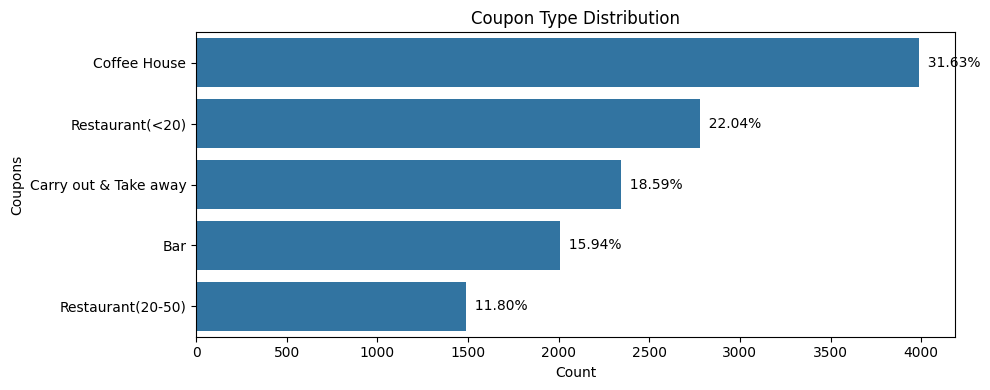

In [7]:
# Checking Unique records to make sure there is no duplicate coupons 
df["coupon"].unique()

# value_counts drops NaN by default.
#count = df["coupon"].value_counts().reset_index()
counts = df.groupby("coupon").size().sort_values(ascending=False).reset_index(name="count")

# Total Coupon Count
total_count = counts["count"].sum()

counts["percent"] = ((counts["count"] / total_count)* 100).round(2)

# Sort by count desc for a tidy plot
counts = counts.sort_values("count", ascending=False)

## Draw the barplot
plt.figure(figsize=(10, 4))
ax = sns.barplot(data=counts, x="count", y="coupon", orient="h")

ax.set_title("Coupon Type Distribution")
ax.set_xlabel("Count")
ax.set_ylabel("Coupons")

# Add % labels at bar ends
for i, row in counts.iterrows():
    ax.text(row["count"], i, f"  {row['percent']:.2f}%", va="center")

plt.tight_layout()
plt.show()


6. Use a histogram to visualize the temperature column.

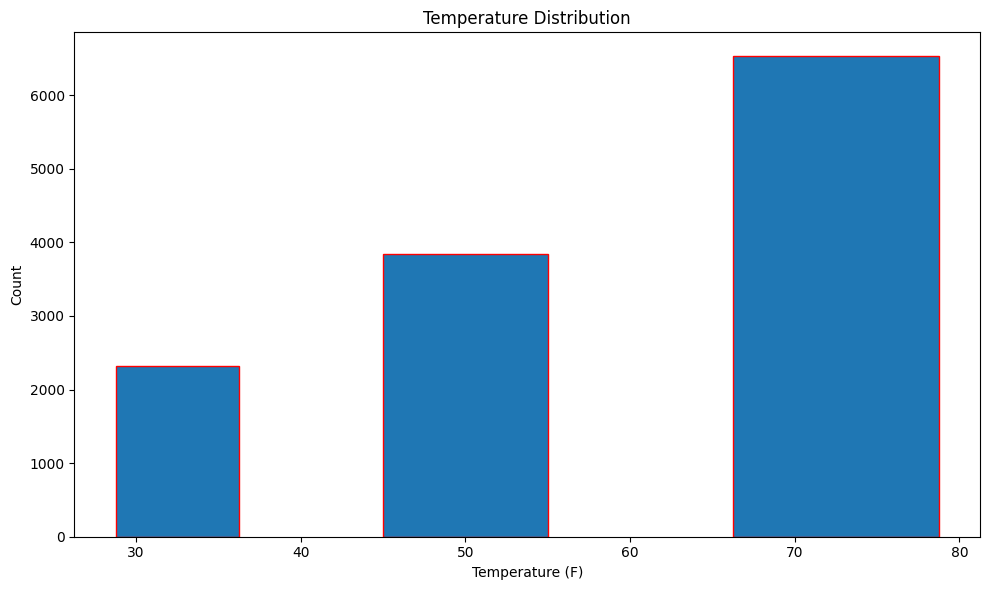

In [8]:
# Select non NaN values
temp = pd.to_numeric(data["temperature"], errors="coerce").dropna()

# Choose bin edges that bracket the discrete values 30, 55, 80
bins = [25, 40, 60, 85]

plt.figure(figsize=(10, 6))
plt.hist(temp, bins=bins, edgecolor="red", rwidth=0.5)

plt.title("Temperature Distribution")
plt.xlabel("Temperature (F)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
bar_coupons = df[df["coupon"].str.contains("Bar", case=False, na=False)]
total_bar_count = bar_coupons["coupon"].size
print(total_bar_count)

2010


2. What proportion of bar coupons were accepted?


In [10]:
# Coerce column Y to a numeric value and NaN
accepted_bar_coupons = pd.to_numeric(bar_coupons["Y"], errors="coerce") == 1
accepted_bar_coupons_count = accepted_bar_coupons.sum()

# Found the accepted proportion of bar coupons 
bar_proportion = accepted_bar_coupons_count/total_bar_count

# What proportion of bar coupons were accepted?
print(f"Proportion accepted: {bar_proportion:.4f}, Proportion % accepted: {bar_proportion * 100:.2f}%")

Proportion accepted: 0.4100, Proportion % accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
# Define bar counts
less_than_3 = ["less1", "1~3"]
more_than_3 = ["gt8", "4~8"]

# Total count bar matches for less than 3
total_bar_less3_count = bar_coupons["Bar"].isin(less_than_3).sum()
#print(total_bar_less3_count)

# Total count bar matches for less than 3 and coupons has been used
bar_coupon_less3_count = (bar_coupons["Bar"].isin(less_than_3) & (bar_coupons["Y"] == 1)).sum()
#print(bar_coupon_less3_count)

# Total count bar matches for more than 3
total_bar_more3_count = bar_coupons["Bar"].isin(more_than_3).sum()
#print(total_bar_more3_count)

# Total count bar matches for more than 3 and coupons has been used
bar_coupon_more3_count = (bar_coupons["Bar"].isin(more_than_3) & (bar_coupons["Y"] == 1)).sum()
#print(bar_coupon_more3_count)

acceptance_rate_less = (bar_coupon_less3_count/total_bar_less3_count) * 100
acceptance_rate_more = (bar_coupon_more3_count/total_bar_more3_count) * 100
                         
print(f"<=3/month: {bar_coupon_less3_count}/{total_bar_less3_count} = {acceptance_rate_less:.2f}%")
print(f">3/month: {bar_coupon_more3_count}/{total_bar_more3_count} = {acceptance_rate_more:.2f}%")

<=3/month: 507/960 = 52.81%
>3/month: 153/199 = 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:
# Define bar counts as >1/month
more_than_1 = ["1~3", "gt8", "4~8"]

## >1/month & age>25
# Total count bar matches for more than 1 and the age is over 25
bar_coupon_more1_count = (bar_coupons["Bar"].isin(more_than_1) & (pd.to_numeric(bar_coupons["age"], errors="coerce") > 25)).sum()

# Total count bar matches for more than 1 and the age is over 25 and coupon expected
bar_coupon_more1_accepted_count = (bar_coupons["Bar"].isin(more_than_1) & (pd.to_numeric(bar_coupons["age"], errors="coerce") > 25) & (bar_coupons["Y"] == 1)).sum()

acceptance_rate4a_ratio = bar_coupon_more1_accepted_count/bar_coupon_more1_count
                                  
print(f">1/month & age>25: {bar_coupon_more1_accepted_count}/{bar_coupon_more1_count} = {acceptance_rate4a_ratio:.2%}")

## ALL Others
# Total count bar NOT matches for more than 1 and the age is NOT over 25
bar_coupon_all_others = ~(bar_coupons["Bar"].isin(more_than_1) & (pd.to_numeric(bar_coupons["age"], errors="coerce") > 25))

# Total count bar matches for more than 1 and the age is over 25 and coupon expected
bar_coupon_allothers_accepted = ((bar_coupon_all_others) & (bar_coupons["Y"] == 1))

acceptance_rate4b_ratio = bar_coupon_allothers_accepted.sum()/bar_coupon_all_others.sum()

print(f"All others: {bar_coupon_allothers_accepted.sum()}/{bar_coupon_all_others.sum()} = {acceptance_rate4b_ratio:.2%}")

>1/month & age>25: 247/353 = 69.97%
All others: 577/1657 = 34.82%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [13]:


## Drivers who go to bars more than once a month
drivers_more_than1 = bar_coupons["Bar"].isin(more_than_1)
                      
## Drivers who have passengers as kids
# Total count bar matches for more than 1 and has no childeren
drivers_no_kids = (pd.to_numeric(bar_coupons["has_children"], errors="coerce") == 0)

## Occupations other than farming, fishing, or forestry
drivers_not_farm_fish_forest = ~bar_coupons["occupation"].str.contains(r"farm|fish|forest", na=False)

# Drivers more then 1 month & no kids & non-farm/fish/forest
drivers_more_than1_no_kids_occu = (drivers_more_than1 & drivers_no_kids & drivers_not_farm_fish_forest).sum()
#print(drivers_more_than1_no_kids_occu)

# Drivers with All others
drivers_more_than1_no_kids_all_othr_occu = (~(drivers_more_than1 & drivers_no_kids & drivers_not_farm_fish_forest)).sum()
#print(drivers_more_than1_no_kids_all_othr_occu)

acceptance_rate5_ratio = drivers_more_than1_no_kids_occu/drivers_more_than1_no_kids_all_othr_occu

print(f">1/mo & has_children==0 & non-farm/fish/forest: {drivers_more_than1_no_kids_occu}/{drivers_more_than1_no_kids_all_othr_occu} = {acceptance_rate5_ratio:.2%}")


>1/mo & has_children==0 & non-farm/fish/forest: 416/1594 = 26.10%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [18]:


## Drivers were not widowed
drivers_marital_status = bar_coupons["maritalStatus"].str.contains("Widowed")
#print(drivers_marital_status.sum())

## Drivers go to bars more than once a month and are under the age of 30 
drivers_under_age_30 = (pd.to_numeric(bar_coupons["age"], errors="coerce") < 30)
#print(drivers_under_age_30.sum())

## Drivers go to cheap restaurants more than 4 times a month
more_than_4 = ["gt8", "4~8"]
drivers_go_to_rest_20 = bar_coupons["RestaurantLessThan20"].isin(more_than_1)
#print(drivers_go_to_rest_20)

## Drivers Income less than 50K 
bar_coupons = bar_coupons.copy()
income_range = bar_coupons["income"].astype("string")

def parse_salary_range(label: str):
    s = label.replace(",", "").lower()
    # finds all runs of digits in the string s
    # converts each of those digit strings to integers.
    nums = list(map(int, re.findall(r"\d+", s)))
    if s.startswith("less than"):
        return 0, nums[0]                 # [0, upper)
    if "or more" in s:
        return nums[0], np.inf            # [lower, ∞)
    return nums[0], nums[1]               # [lower, upper]
    
# Expand the (lower, upper) into two columns and assign
bar_coupons[["lower", "upper"]] = income_range.apply(parse_salary_range).apply(pd.Series)

#print(bar_coupons[["income", "lower", "upper"]].head(10))

mask_lt_50k = bar_coupons["upper"] < 50000

#print(mask_lt_50k)

## Now process go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
## go to bars more than once a month and are under the age of 30 OR
## go to cheap restaurants more than 4 times a month and income is less than 50K.

acceptance_rate6 = (drivers_more_than1 & drivers_no_kids & drivers_marital_status) | (drivers_more_than1 & drivers_under_age_30) | (drivers_go_to_rest_20 & mask_lt_50k)

not_acceptance_rate6 = ~acceptance_rate6

#print(acceptance_rate6.sum())
#print(not_acceptance_rate6.sum())

acceptance_rate6_ratio = acceptance_rate6.sum()/not_acceptance_rate6.sum()

print(f"Compare Acceptance Rate: {acceptance_rate6.sum()}/{not_acceptance_rate6.sum()} = {acceptance_rate6_ratio:.2%}")


Compare Acceptance Rate: 973/1037 = 93.83%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [19]:
# Hypothesis: Habitual bar-goers (especially 25+ adults) drive acceptance

# Drivers who visit bars regularly are the ones most likely to redeem bar coupons, with acceptance jumping from about 52.81% (<=3/month) to 76.88% (>3×/month). 
# Among people who go more than once a month, being over 25 further boosts acceptance to 69.97% versus 34.82% for everyone else. 
# In short, the coupon works best as a nudge for an existing habit rather than a trigger for a new behavior.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [23]:
# Coffee gowers visitied less1 and accepted copuon
visits_less1 = ["less1"]
coffee_coupon_less1 = ((bar_coupons["CoffeeHouse"].isin(visits_less1)) & (bar_coupons["Y"] == 1)).sum()
#print(coffee_coupon_less1)

total_coffee_visit_less1 = (bar_coupons["CoffeeHouse"].isin(visits_less1)).sum()
#print(total_coffee_visit_less1)

acceptance_rate_less1 = coffee_coupon_less1/total_coffee_visit_less1

print(f"Driver visiting less than 1, using coupons: {coffee_coupon_less1}/{total_coffee_visit_less1} = {acceptance_rate_less1:.2%}")

# Coffee gowers visitied 1~3 and accepted copuon
visits_1_3 = ["1~3"]
coffee_coupon_1_3 = ((bar_coupons["CoffeeHouse"].isin(visits_1_3)) & (bar_coupons["Y"] == 1)).sum()
#print(coffee_coupon_1_3)

total_coffee_visit_1_3 = (bar_coupons["CoffeeHouse"].isin(visits_1_3)).sum()
#print(total_coffee_visit_1_3)

acceptance_rate_1_3 = coffee_coupon_1_3/total_coffee_visit_1_3

print(f"Driver visiting between 1 & 3, using coupons: {coffee_coupon_1_3}/{total_coffee_visit_1_3} = {acceptance_rate_1_3:.2%}")

# Coffee gowers visitied 4~8 and accepted copuon
visits_4_8 = ["4~8"]
coffee_coupon_4_8 = ((bar_coupons["CoffeeHouse"].isin(visits_4_8)) & (bar_coupons["Y"] == 1)).sum()
#print(coffee_coupon_4_8)

total_coffee_visit_4_8 = (bar_coupons["CoffeeHouse"].isin(visits_4_8)).sum()
#print(total_coffee_visit_4_8)

acceptance_rate_4_8 = coffee_coupon_4_8/total_coffee_visit_4_8

print(f"Driver visiting between 4 & 8, using coupons: {coffee_coupon_4_8}/{total_coffee_visit_4_8} = {acceptance_rate_4_8:.2%}")

# Coffee gowers visitied gt8 and accepted copuon
visits_gt8 = ["gt8"]
coffee_coupon_gt8 = ((bar_coupons["CoffeeHouse"].isin(visits_gt8)) & (bar_coupons["Y"] == 1)).sum()
#print(coffee_coupon_gt8)

total_coffee_visit_gt8 = (bar_coupons["CoffeeHouse"].isin(visits_gt8)).sum()
#print(total_coffee_visit_gt8)

acceptance_rate_gt8 = coffee_coupon_gt8/total_coffee_visit_gt8

print(f"Driver visiting grater than 8, using coupons: {coffee_coupon_gt8}/{total_coffee_visit_gt8} = {acceptance_rate_gt8:.2%}")

# Acceptance rises sharply from infrequent coffee visitors to moderate ones, then flattens. 
# Drivers who visit <1/month accept the least (37.6%). 
# Acceptance jumps for 1–3/month (46.7%) and stays about the same for 4–8/month (46.4%). 
# For >8/month, it dips slightly (44.8%), but that group is also the smallest sample.

## Overall acceptance
total_visits = ["less1", "1~3", "4~8", "gt8"]

total_coffee_visits = (bar_coupons["CoffeeHouse"].isin(total_visits)).sum()
#print(total_coffee_visits)

total_coffee_visits_with_coupon = ((bar_coupons["CoffeeHouse"].isin(total_visits)) & (bar_coupons["Y"] == 1)).sum()
#print(total_coffee_visits_with_coupon)

acceptance_rate_coffee = total_coffee_visits_with_coupon/total_coffee_visits

print(f"Overall Coffee House Coupon Acceptance: {total_coffee_visits_with_coupon}/{total_coffee_visits} = {acceptance_rate_coffee:.2%}")


Driver visiting less than 1, using coupons: 205/546 = 37.55%
Driver visiting between 1 & 3, using coupons: 232/497 = 46.68%
Driver visiting between 4 & 8, using coupons: 135/291 = 46.39%
Driver visiting grater than 8, using coupons: 78/174 = 44.83%
Overall Coffee House Coupon Acceptance: 650/1508 = 43.10%


In [77]:
# Group by time with visit count and coupons accepted
time_summary = (
    bar_coupons.groupby("time", dropna=False)
        .agg(visit_count=("time", "size"), coupon_accepted=("Y", "sum"))
        .reset_index()
)

# Total visit counts and coupon accepted
total_visit_count = time_summary["visit_count"].sum()
total_coupon_accepted = time_summary["coupon_accepted"].sum()

#print(total_visit_count)
#print(total_coupon_accepted)

# Shares and acceptance rate
time_summary["visit_percentage"] = ((time_summary["visit_count"] / total_visit_count) * 100 ).round(2)
time_summary["ovarall_accepted_coupon"] = ((time_summary["coupon_accepted"] / total_coupon_accepted) * 100 ).round(2)
time_summary["per_time_accepted_coupon"] = ((time_summary["coupon_accepted"] / time_summary["visit_count"]) * 100 ).round(2)

print(time_summary)


2010
824
   time  visit_count  coupon_accepted  visit_percentage  \
0  10AM          443              160             22.04   
1  10PM          399              183             19.85   
2   2PM          118               40              5.87   
3   6PM          563              263             28.01   
4   7AM          487              178             24.23   

   ovarall_accepted_coupon  per_time_accepted_coupon  
0                    19.42                     36.12  
1                    22.21                     45.86  
2                     4.85                     33.90  
3                    31.92                     46.71  
4                    21.60                     36.55  


In [81]:
# Group by passenger with visit count and coupons accepted
passanger_summary = (
    bar_coupons.groupby("passanger", dropna=False)
        .agg(visit_count=("passanger", "size"), coupon_accepted=("Y", "sum"))
        .reset_index()
)

# Total visit counts and coupon accepted
total_visit_count = passanger_summary["visit_count"].sum()
total_coupon_accepted = passanger_summary["coupon_accepted"].sum()

#print(total_visit_count)
#print(total_coupon_accepted)

# Shares and acceptance rate
passanger_summary["visit_percentage"] = ((passanger_summary["visit_count"] / total_visit_count) * 100 ).round(2)
passanger_summary["ovarall_accepted_coupon"] = ((passanger_summary["coupon_accepted"] / total_coupon_accepted) * 100 ).round(2)
passanger_summary["per_passanger_accepted_coupon"] = ((passanger_summary["coupon_accepted"] / passanger_summary["visit_count"]) * 100 ).round(2)

print(passanger_summary)

2010
824
   passanger  visit_count  coupon_accepted  visit_percentage  \
0      Alone         1198              488             59.60   
1  Friend(s)          335              187             16.67   
2     Kid(s)          204               43             10.15   
3    Partner          273              106             13.58   

   ovarall_accepted_coupon  per_passanger_accepted_coupon  
0                    59.22                          40.73  
1                    22.69                          55.82  
2                     5.22                          21.08  
3                    12.86                          38.83  


In [84]:
# Group by expiration with visit count and coupons accepted
expiration_summary = (
    bar_coupons.groupby("expiration", dropna=False)
        .agg(visit_count=("expiration", "size"), coupon_accepted=("Y", "sum"))
        .reset_index()
)

# Total visit counts and coupon accepted
total_visit_count = expiration_summary["visit_count"].sum()
total_coupon_accepted = expiration_summary["coupon_accepted"].sum()

#print(total_visit_count)
#print(total_coupon_accepted)

# Shares and acceptance rate
expiration_summary["visit_percentage"] = ((expiration_summary["visit_count"] / total_visit_count) * 100 ).round(2)
expiration_summary["ovarall_accepted_coupon"] = ((expiration_summary["coupon_accepted"] / total_coupon_accepted) * 100 ).round(2)
expiration_summary["per_passanger_accepted_coupon"] = ((expiration_summary["coupon_accepted"] / passanger_summary["visit_count"]) * 100 ).round(2)

print(expiration_summary)

  expiration  visit_count  coupon_accepted  visit_percentage  \
0         1d         1553              640             77.26   
1         2h          457              184             22.74   

   ovarall_accepted_coupon  per_passanger_accepted_coupon  
0                    77.67                          53.42  
1                    22.33                          54.93  
